In [4]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [5]:
m=1/(4*0.5e-06)
kg=1/1.0e-15
tiempo=1.0*1e9
newton=m*kg/(tiempo**2)


a=0.5e-6*m #0.5 µm
masa=1.0e-15*kg #1pg
densidad_agua=1.0*(kg/(m**3)) #1.000 kg/m³
nu=1.0e-3*(newton*tiempo*m**-2) #1.0e-3 N*s/m2
velocidad=8.0e-3*(m/tiempo) #8mm/s

print "radio" 
print a
print "masa" 
print masa
print "densidad agua"
print densidad_agua
print "nu"
print nu
print "velocidad"
print velocidad

radio
0.25
masa
1.0
densidad agua
0.008
nu
0.002
velocidad
4e-06


In [6]:
h=(10*a)
s= velocidad/(1.0-0.0)
print h/a
print s
print s*4

10.0
4e-06
1.6e-05


In [7]:
#efectos rotacionales
def Tr(a,h): 
    x=a/h
    return -(1+(5.0/16.0)*x**3)

def Fr(a,h):
    x=a/h
    return (1.0/8.0)*(x**4)

#efectos translacionales
def Tt(a,h):
    x=a/h
    return (3.0/32.0)*(x**4)

def Ft(a,h):
    x=a/h
    respuesta=1-(9.0/16.0)*x
    return -1.0/(respuesta) 


#efectos de cortantes
def Ts(a,h):
    x=a/h
    return 1-(3.0/16.0)*(x)**3

def Fs(a,h):
    x=a/h
    return 1+(9.0/16.0)*(x)


#velocidades estacionaris
def W_goldman(h,s,a):
    respuesta =(2.0*(h/a)*Fs(a,h)*Tt(a,h)-Ft(a,h)*Ts(a,h))/(Ft(a,h)*Tr(a,h)-Fr(a,h)*Tt(a,h))
    return respuesta*0.5*s
def U_goldman(h,s,a):
    respuesta= (0.5*(a/h)*Fr(a,h)*Ts(a,h)-Fs(a,h)*Tr(a,h))/(Ft(a,h)*Tr(a,h)-Fr(a,h)*Tt(a,h))
    return respuesta*h*s

In [8]:
print W_goldman(h,s,a)
print U_goldman(h,s,a)
W=W_goldman(h,s,a)
U=U_goldman(h,s,a)

1.99937400932e-06
9.96836527159e-06


In [127]:
b=np.loadtxt("evolucion_2.5_1.6e-5.dat", delimiter=',')
b=transpose(b)
inicio=4000
dx = 0.075
dt = 0.01
t=(b[0][4000:]-4000)*1e-9

(0, 1.2e-05)

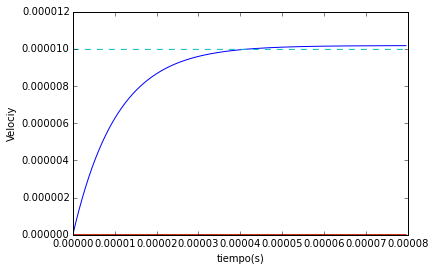

In [131]:
plot(t,(dx/dt)*b[1][4000:],label="x")
plot(t,(dx/dt)*b[2][4000:],label="y")
plot(t,(dx/dt)*b[3][4000:],label="z")
plot(t,U*ones(len(t)),linestyle='--')
ylabel("Velociy")
xlabel("tiempo(s)")
ylim(0)

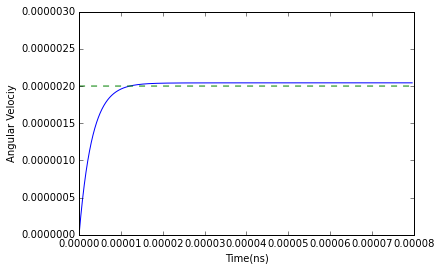

In [129]:
plot(t,(1/dt)*b[5][4000:],label="y")

plot(t,W*ones(len(t)),linestyle='--')
ylim(0,0.3e-5)

xlabel("Time(ns)")
ylabel("Angular Velociy")


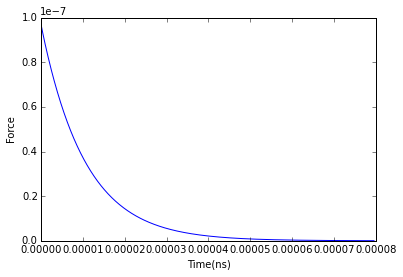

In [133]:
plot(t,b[7][4000:],label="x")
xlabel("Time(ns)")
ylabel("Force")

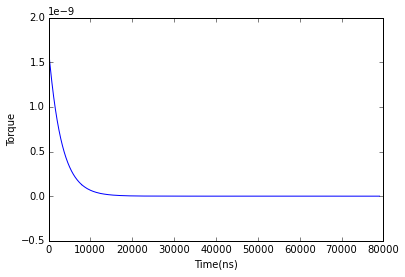

In [45]:
plot(t,b[8][4000:],label="y")
xlabel("Time(ns)")
ylabel("Torque")

In [111]:
d=np.loadtxt("1.6e-5_variar_alturas.txt", delimiter=',')
c=np.loadtxt("datos_de_fuerza_teoricos.txt", delimiter=',')
d=transpose(d)
c=transpose(c)
altura=d[0]/a
fuerza_normalizada=d[1]/(6*pi*nu*0.25*s*d[0])
torque_normalizada=d[2]/(4*pi*nu*(0.25)**3*s) 

(0, 2.5)

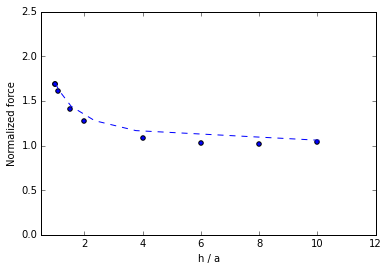

In [123]:
scatter(altura,fuerza_normalizada)
xlabel("h / a")
ylabel("Normalized force")
plot(c[0],c[1],linestyle='--')
xlim(0.5,12)
ylim(0,2.5)

(0, 2)

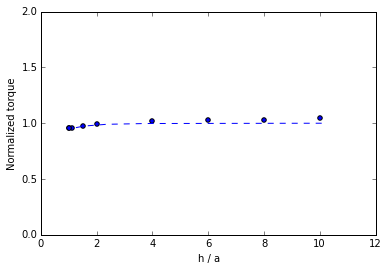

In [113]:
scatter(altura,torque_normalizada)
plot(c[0],c[2],linestyle='--')
xlabel("h / a")
ylabel("Normalized torque")
ylim(0,2)

In [114]:
torque_normalizada

array([ 1.04651199,  1.03146009,  1.02733524,  1.0157491 ,  0.98950685,
        0.97834143,  0.95725308,  0.95299533,  0.95317951])